### The purpose of this exercise is to understand the trends in video game sales.

In [37]:
import pandas as pd
import numpy  as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
games = pd.read_csv("./dataset/Video_Games.csv")
games = pd.DataFrame(games)

In [39]:
games.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
print("Dataset shape :",games.shape)
games.columns = [i.lower() for i in games.columns]

Dataset shape : (16719, 16)


In [41]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16717 non-null  object 
 1   platform         16719 non-null  object 
 2   year_of_release  16450 non-null  float64
 3   genre            16717 non-null  object 
 4   publisher        16665 non-null  object 
 5   na_sales         16719 non-null  float64
 6   eu_sales         16719 non-null  float64
 7   jp_sales         16719 non-null  float64
 8   other_sales      16719 non-null  float64
 9   global_sales     16719 non-null  float64
 10  critic_score     8137 non-null   float64
 11  critic_count     8137 non-null   float64
 12  user_score       10015 non-null  object 
 13  user_count       7590 non-null   float64
 14  developer        10096 non-null  object 
 15  rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [42]:
games.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [43]:
games.dropna(how = "all",inplace = True)
print(games.shape)

(16719, 16)


## EDA

## Year wise global game sales
### The maximum number of games sales occured in 2008.

Text(0.5, 1.0, 'Year wise global game sales :')

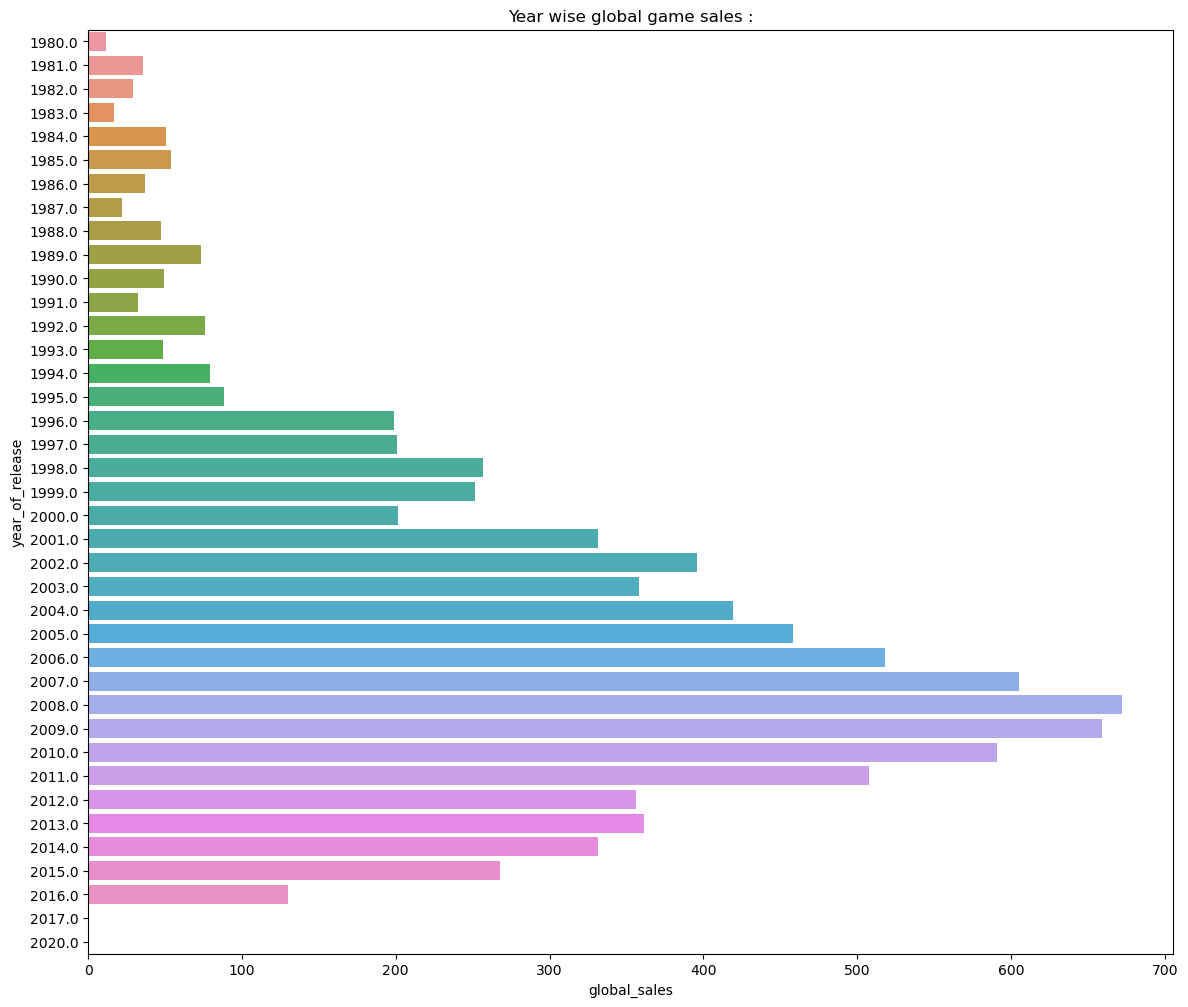

In [44]:
plt.rcParams['figure.figsize'] = (14,12)
year_wise_game_sales = games.groupby(['year_of_release'])[['global_sales']].sum()
sns.barplot(year_wise_game_sales, x = "global_sales", y = year_wise_game_sales.index, orient='h')
plt.title("Year wise global game sales :")

## Platform wise global sales
### PS2 tops the charts. Combined Playstation game sales far surpass Xbox.

Text(0.5, 1.0, 'Top 10 Platform wise global game sales :')

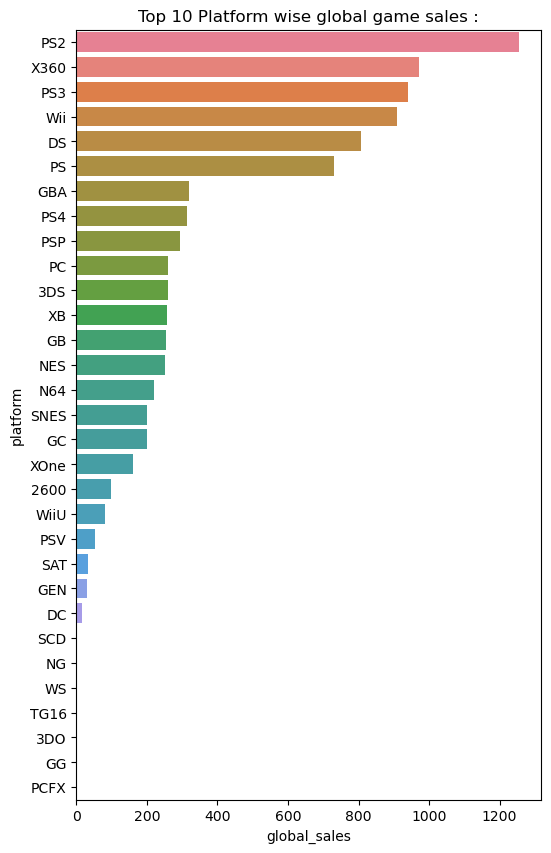

In [45]:
plt.rcParams['figure.figsize'] = (6,10)
platform_wise_game_sales  = pd.pivot_table(games ,index = ["platform"] ,values = ["global_sales"], aggfunc = np.sum)
platform_wise_game_sales  = platform_wise_game_sales.sort_values(by = "global_sales",ascending  = False)
sns.barplot(platform_wise_game_sales, x = "global_sales", y = platform_wise_game_sales.index,orient = "h",palette = "husl")
plt.title("Top 10 Platform wise global game sales :")

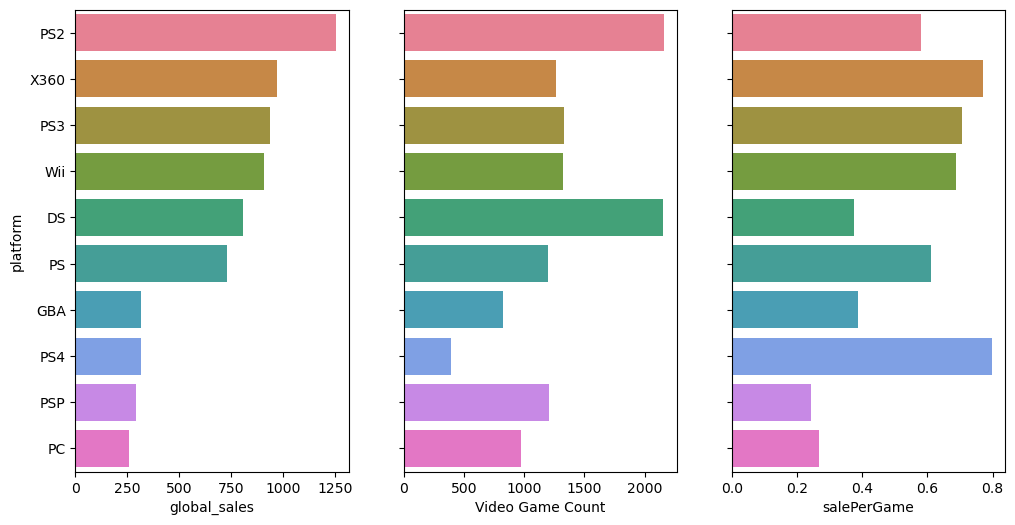

In [46]:
plt.rcParams['figure.figsize'] = (8,6)
platform_wise_game_sales  = games.groupby(['platform'])[['name','global_sales']].agg({'name':'count', 'global_sales':'sum'})
platform_wise_game_sales['salePerGame'] = platform_wise_game_sales['global_sales']/platform_wise_game_sales['name']
#pd.pivot_table(games ,index = "genre" ,values = "global_sales",aggfunc = np.sum)
platform_wise_game_sales  = platform_wise_game_sales.sort_values(by = "global_sales",ascending  = False).head(10)

plt.rcParams['figure.figsize'] = (12,6)
fig, axes = plt.subplots(1,3)

c1 = sns.barplot(platform_wise_game_sales, x = "global_sales", y=platform_wise_game_sales.index, orient = "h",palette = "husl", ax=axes[0])
c2 = sns.barplot(platform_wise_game_sales, x = "name", y=platform_wise_game_sales.index, orient = "h",palette = "husl", ax=axes[1])
c2.set_xlabel("Video Game Count")
c2.set_ylabel("")
c2.set_yticklabels([])
c3 = sns.barplot(platform_wise_game_sales, x = "salePerGame", y=platform_wise_game_sales.index, orient = "h",palette = "husl", ax=axes[2])
c3.set_ylabel("")
c3.set_yticklabels([])
plt.show()

## Genre wise sales

### In terms of gross sale volumne action emerges at the top, however it is also the genre with the most number of titles. If we check salePerGame in a given genre, Platform and Shooter games are at the top. 

<i> Who can say no to a good shooting game? </i>

Text(0.5, 1.0, 'Top 10 Genre wise global game sales :')

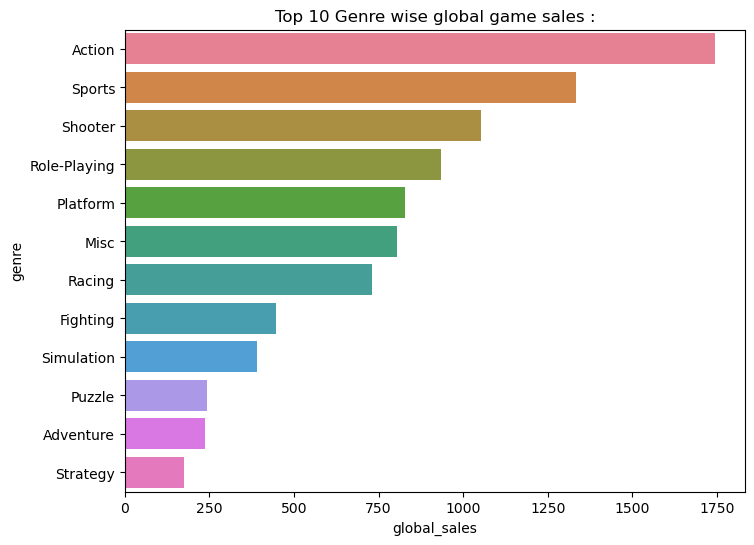

In [47]:
plt.rcParams['figure.figsize'] = (8,6)
genre_wise_game_sales  = games.groupby(['genre'])[['name','global_sales']].agg({'name':'count', 'global_sales':'sum'})
genre_wise_game_sales['salePerGame'] = genre_wise_game_sales['global_sales']/genre_wise_game_sales['name']
#pd.pivot_table(games ,index = "genre" ,values = "global_sales",aggfunc = np.sum)
genre_wise_game_sales  = genre_wise_game_sales.sort_values(by = "global_sales",ascending  = False)
sns.barplot(genre_wise_game_sales, x = "global_sales", y=genre_wise_game_sales.index, orient = "h",palette = "husl")
plt.title("Top 10 Genre wise global game sales :")

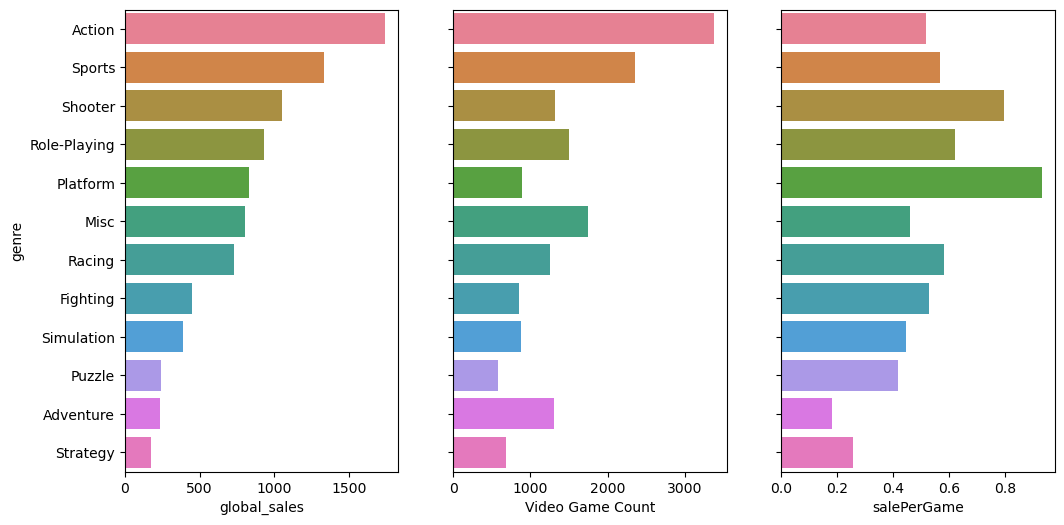

In [48]:
plt.rcParams['figure.figsize'] = (12,6)
fig, axes = plt.subplots(1,3)

c1 = sns.barplot(genre_wise_game_sales, x = "global_sales", y=genre_wise_game_sales.index, orient = "h",palette = "husl", ax=axes[0])
c2 = sns.barplot(genre_wise_game_sales, x = "name", y=genre_wise_game_sales.index, orient = "h",palette = "husl", ax=axes[1])
c2.set_xlabel("Video Game Count")
c2.set_ylabel("")
c2.set_yticklabels([])
c3 = sns.barplot(genre_wise_game_sales, x = "salePerGame", y=genre_wise_game_sales.index, orient = "h",palette = "husl", ax=axes[2])
c3.set_ylabel("")
c3.set_yticklabels([])
plt.show()

## Top 20 global game sales, by publishers

### Nintendo, EA and Activision are the top 3.

In [49]:
#plt.rcParams['figure.figsize'] = (8,6)
#publisher_wise_game_sales  = pd.pivot_table(games ,index = "publisher" ,values = "global_sales",aggfunc = np.sum)
#publisher_wise_game_sales  = publisher_wise_game_sales.sort_values(by = "global_sales",ascending  = False).head(20)
#sns.barplot(publisher_wise_game_sales, x="global_sales",y=publisher_wise_game_sales.index,orient = "h",palette = "husl")
#plt.title("Top 10 Publisher wise global game sales :") 

### Game publishers portfolio

Text(0.5, 1.0, 'Top 20 publishers by game sales :')

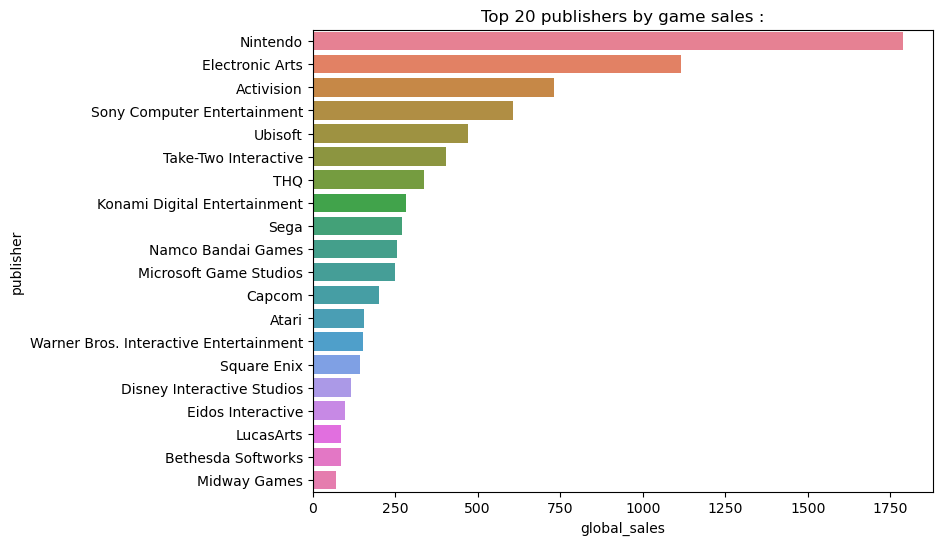

In [50]:
plt.rcParams['figure.figsize'] = (8,6)
publisher_wise_game_sales  = games.groupby(['publisher'])[['name','global_sales']].agg({'name':'count', 'global_sales':'sum'})
publisher_wise_game_sales['salePerGame'] = publisher_wise_game_sales['global_sales']/publisher_wise_game_sales['name']
#pd.pivot_table(games ,index = "genre" ,values = "global_sales",aggfunc = np.sum)
publisher_wise_game_sales  = publisher_wise_game_sales.sort_values(by = "global_sales",ascending  = False).head(20)
sns.barplot(publisher_wise_game_sales, x = "global_sales", y=publisher_wise_game_sales.index, orient = "h",palette = "husl")
plt.title("Top 20 publishers by game sales :")

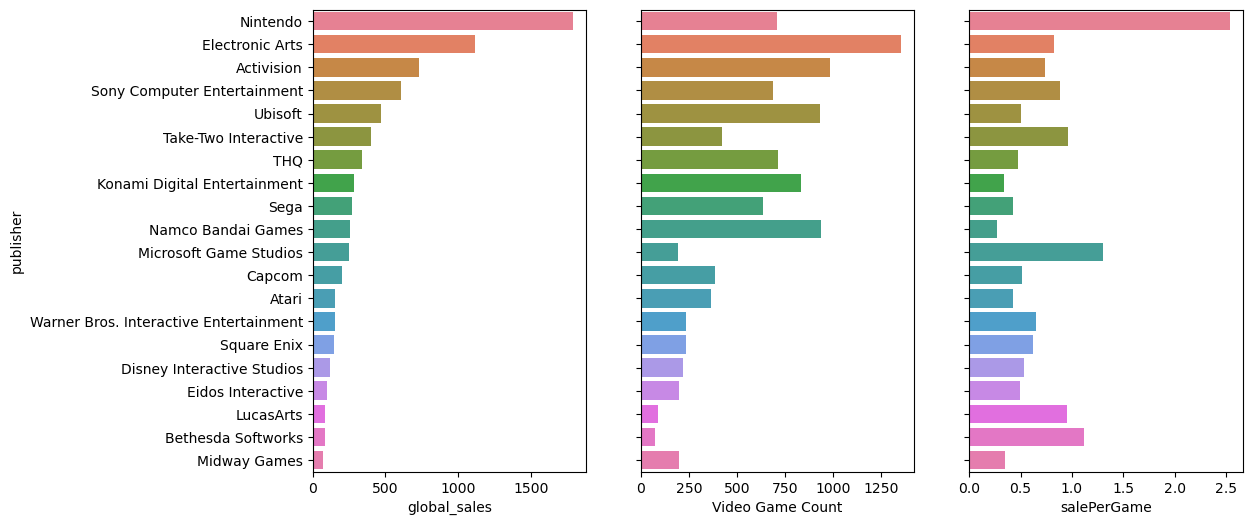

In [51]:
plt.rcParams['figure.figsize'] = (12,6)
fig, axes = plt.subplots(1,3)

c1 = sns.barplot(publisher_wise_game_sales, x = "global_sales", y=publisher_wise_game_sales.index, orient = "h",palette = "husl", ax=axes[0])
c2 = sns.barplot(publisher_wise_game_sales, x = "name", y=publisher_wise_game_sales.index, orient = "h",palette = "husl", ax=axes[1])
c2.set_xlabel("Video Game Count")
c2.set_ylabel("")
c2.set_yticklabels([])
c3 = sns.barplot(publisher_wise_game_sales, x = "salePerGame", y=publisher_wise_game_sales.index, orient = "h",palette = "husl", ax=axes[2])
c3.set_ylabel("")
c3.set_yticklabels([])
plt.show()

In [52]:
def genreByPublisher(genre):
    plt.rcParams['figure.figsize'] = (12,6)
    fig, axes = plt.subplots(1,3)
    publisher_wise_game_sales  = games[games.genre == genre].groupby(['publisher'])[['name','global_sales']].agg({'name':'count', 'global_sales':'sum'})
    publisher_wise_game_sales['salePerGame'] = publisher_wise_game_sales['global_sales']/publisher_wise_game_sales['name']
    publisher_wise_game_sales  = publisher_wise_game_sales.sort_values(by = "global_sales",ascending  = False).head(20)
    c1 = sns.barplot(publisher_wise_game_sales, x = "global_sales", y=publisher_wise_game_sales.index, orient = "h",palette = "husl", ax=axes[0])
    c2 = sns.barplot(publisher_wise_game_sales, x = "name", y=publisher_wise_game_sales.index, orient = "h",palette = "husl", ax=axes[1])
    c2.set_xlabel("Video Game Count")
    c2.set_ylabel("")
    c2.set_yticklabels([])
    c3 = sns.barplot(publisher_wise_game_sales, x = "salePerGame", y=publisher_wise_game_sales.index, orient = "h",palette = "husl", ax=axes[2])
    c3.set_ylabel("")
    c3.set_yticklabels([])
    plt.show()

Genre: Action


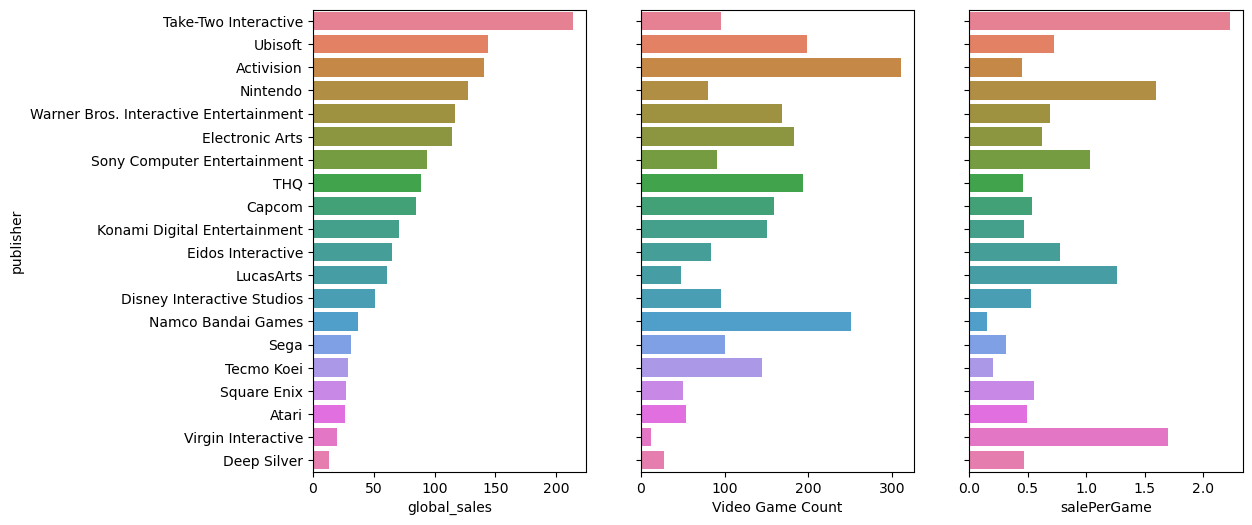

Genre: Sports


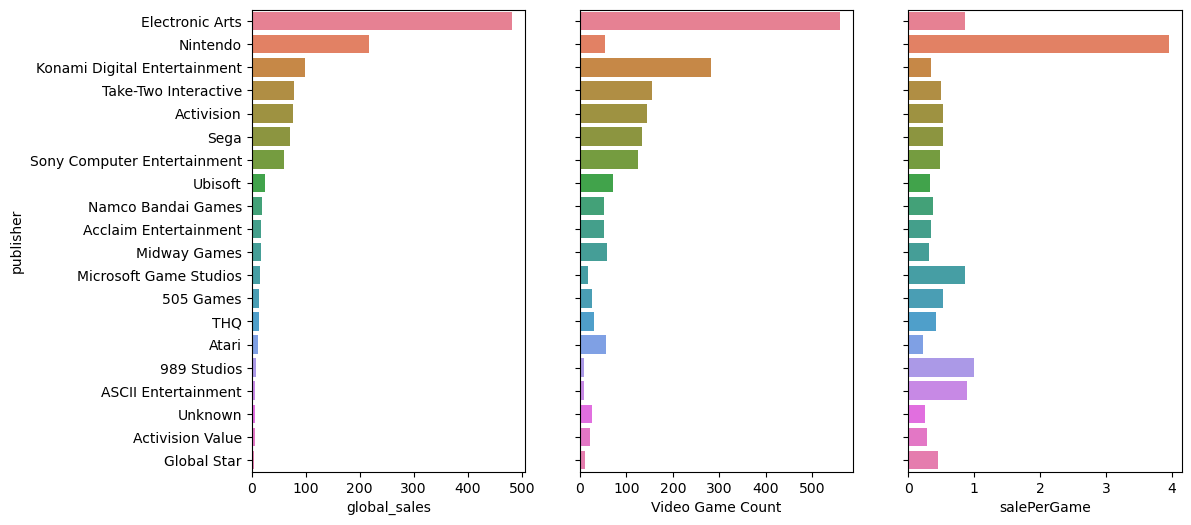

Genre: Shooter


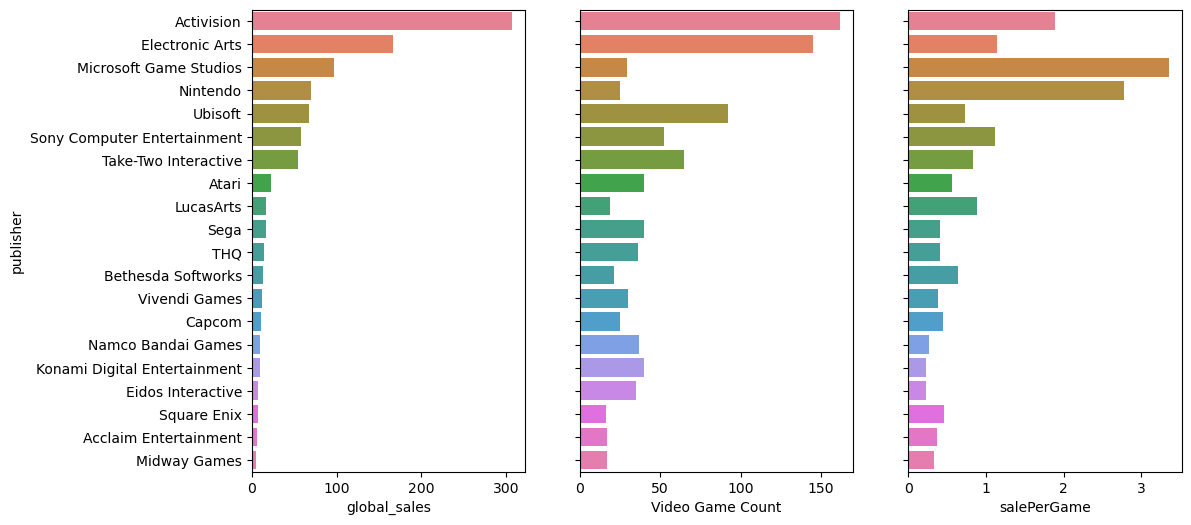

Genre: Role-Playing


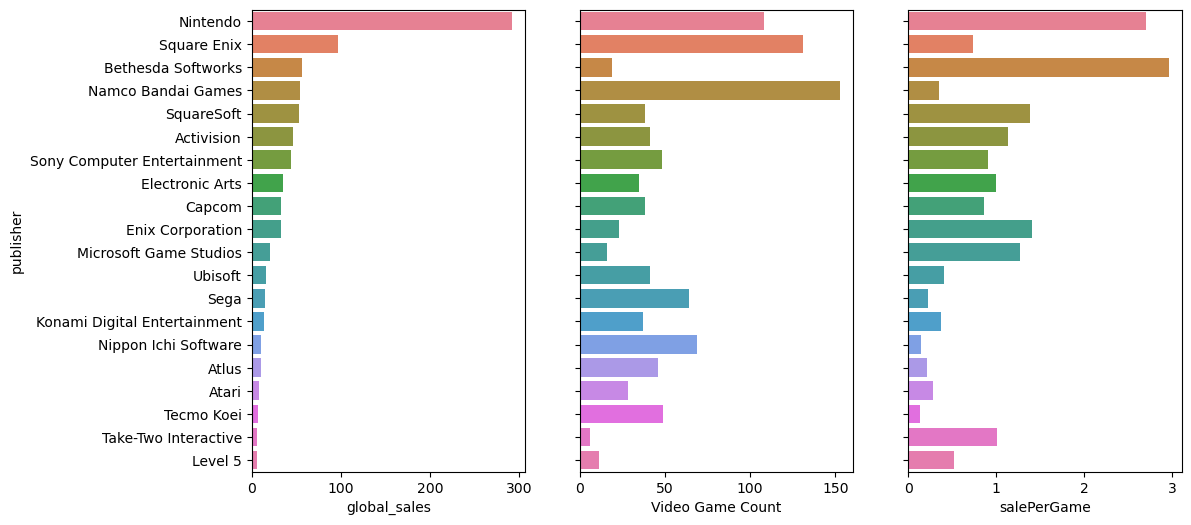

Genre: Platform


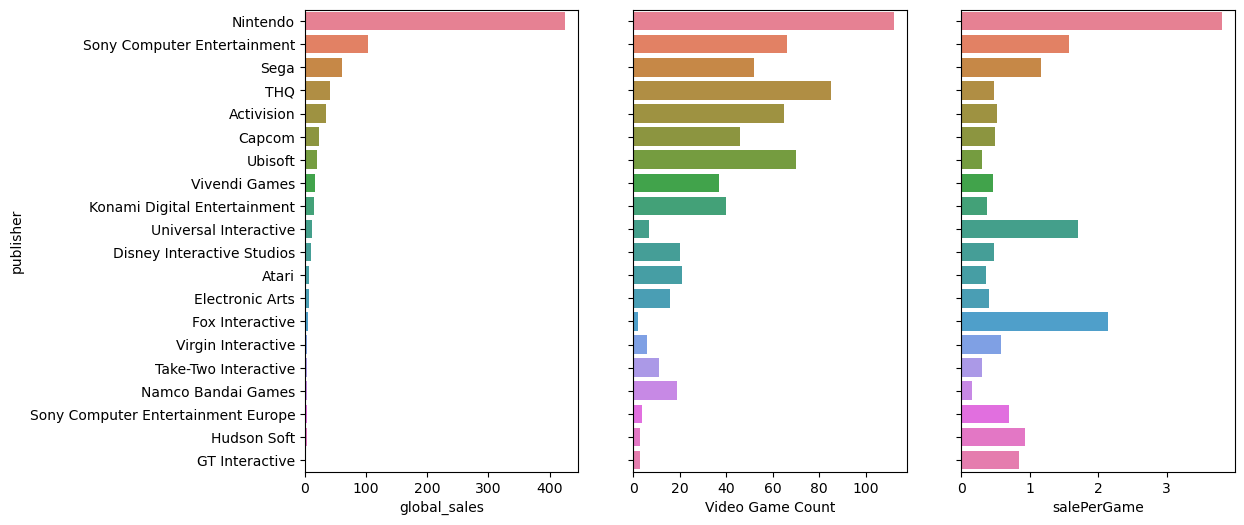

Genre: Misc


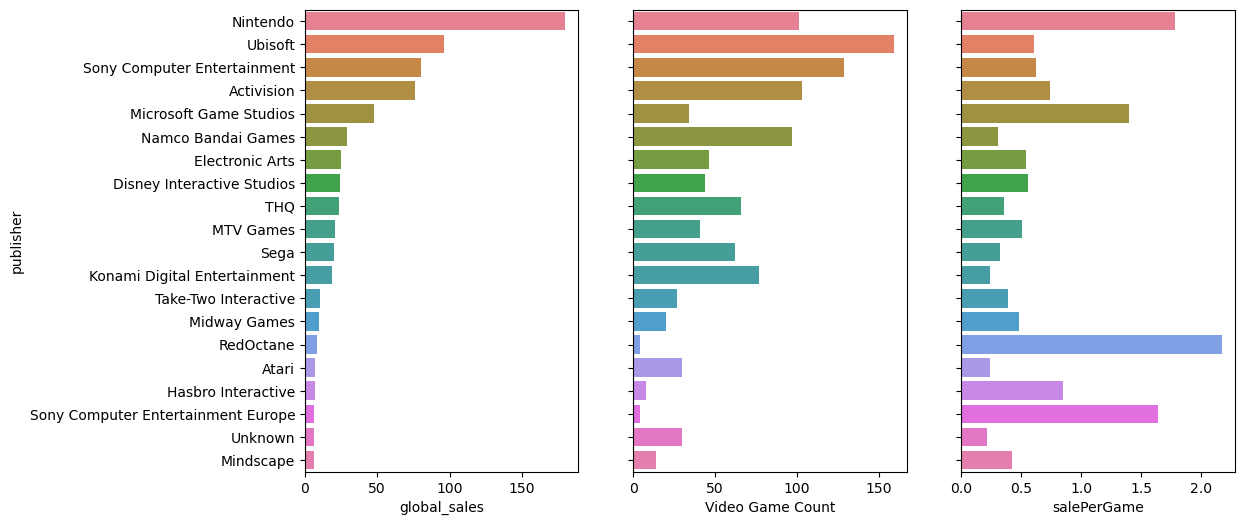

Genre: Racing


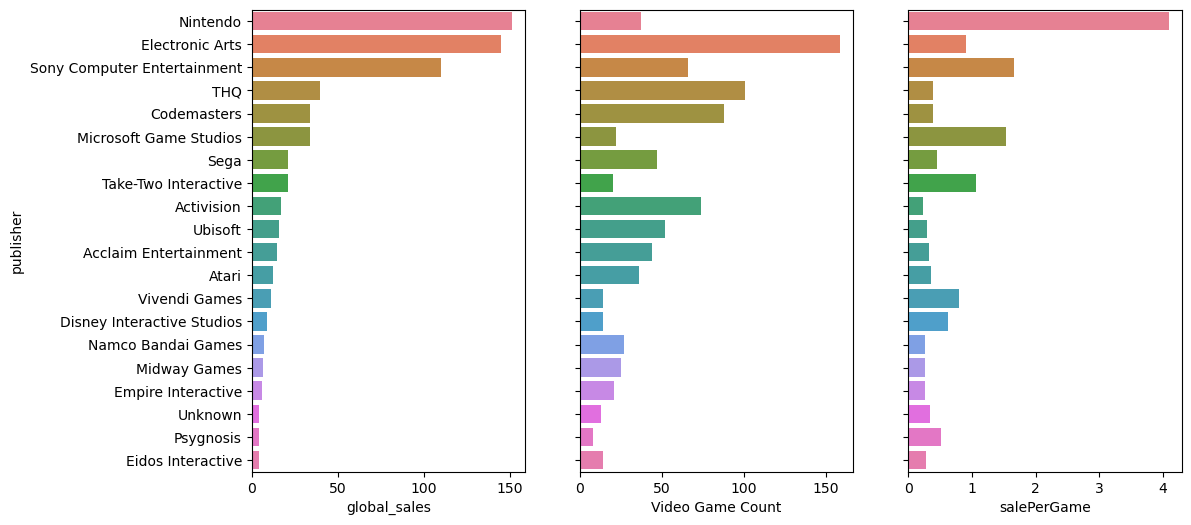

Genre: Fighting


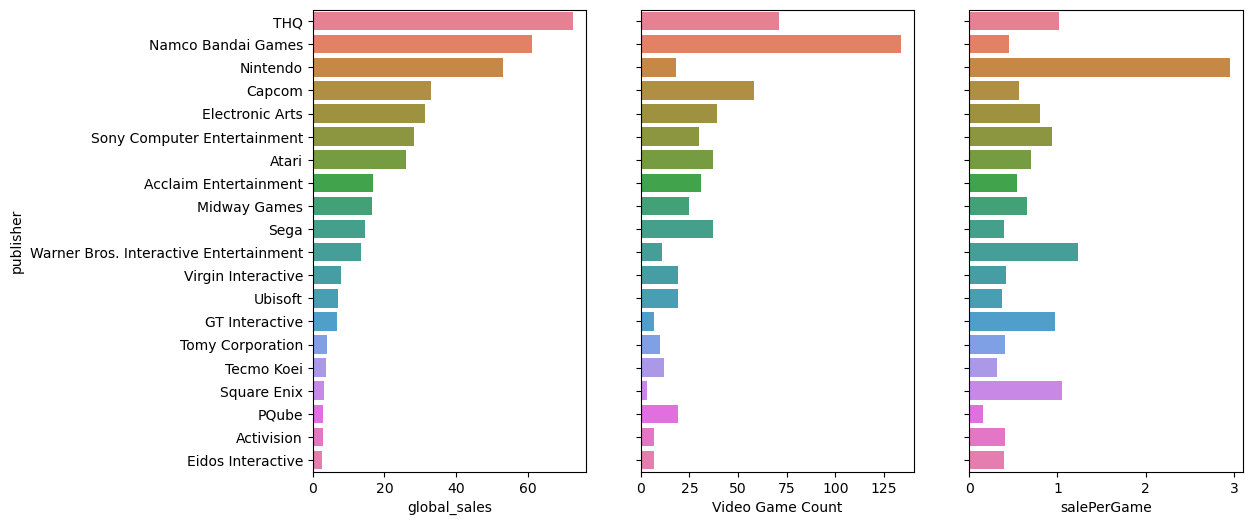

Genre: Simulation


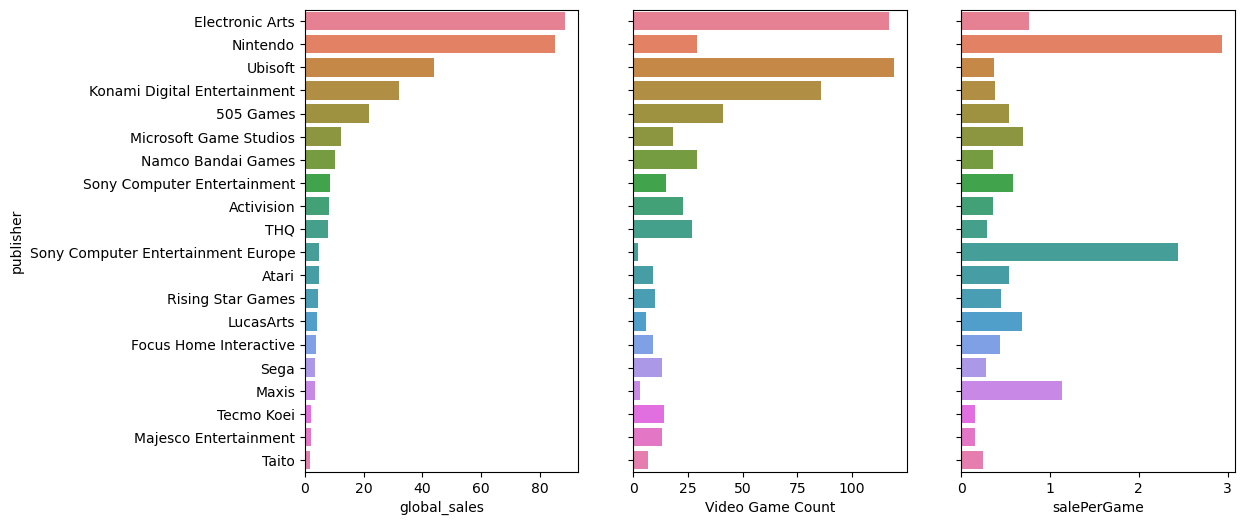

Genre: Puzzle


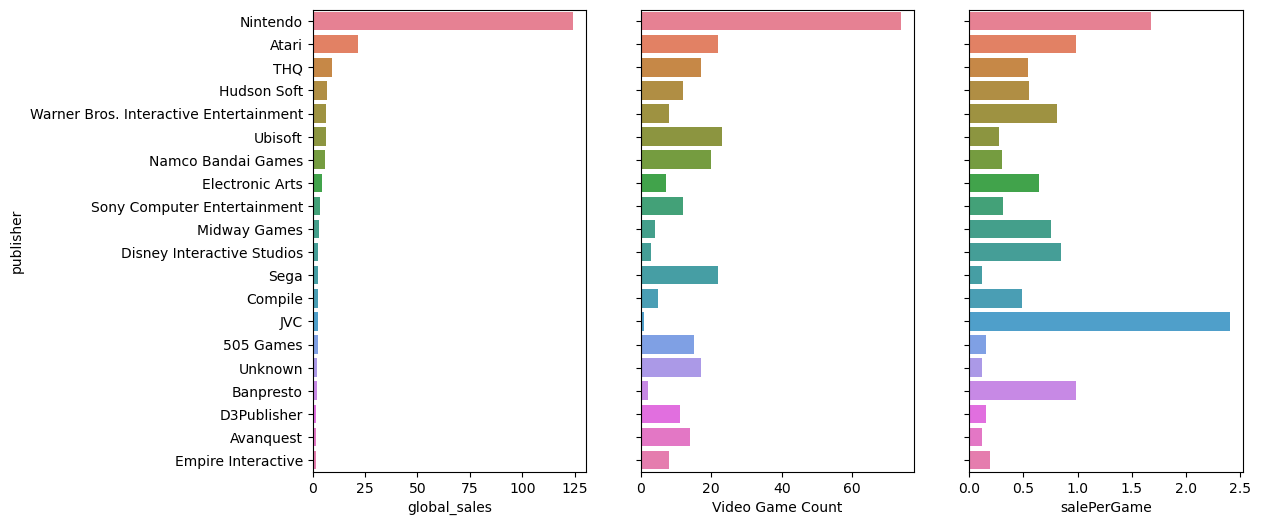

Genre: Adventure


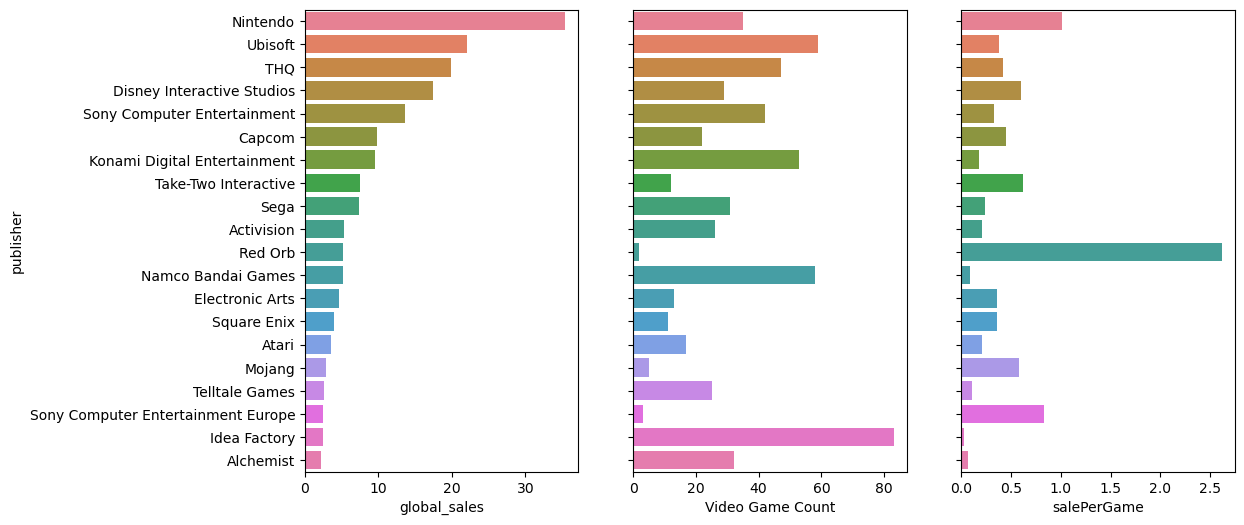

Genre: Strategy


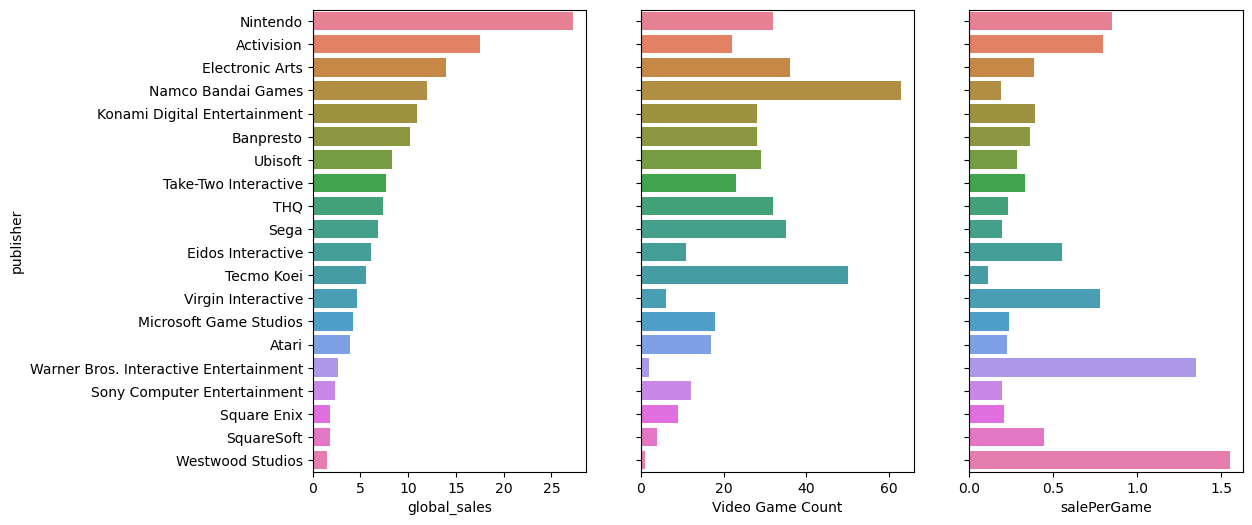

In [53]:
genres_list = list(genre_wise_game_sales.index)
for genre in genres_list:
    print("Genre: "+genre)
    genreByPublisher(genre)

## Top grossing game overall

In [54]:
max_sales = np.max(games.global_sales)
print("The top grossing games are: ") 
topGrossers = games[games.global_sales == max_sales][["name","global_sales"]]
topGrossers

The top grossing games are: 


,name,global_sales
0,Wii Sports,82.53


## Top 10 games per Genre

In [55]:
def gamesPerGenre(genre):
    top_games = games[games.genre == genre][["name","global_sales"]]
    top_games = top_games.sort_values(by = "global_sales",ascending = False )
    top_games = top_games.drop_duplicates(["name"]).head(10)
    plt.rcParams['figure.figsize'] = (6,4)
    plt.figure()
    bp = sns.barplot(top_games, x = "global_sales", y = "name", orient="h")
    bp.set_ylabel("")
    bp.set_title("Top 10 "+genre+" games and their worldwide sales: ")
    for i in bp.containers:
        bp.bar_label(i,)
    plt.show()

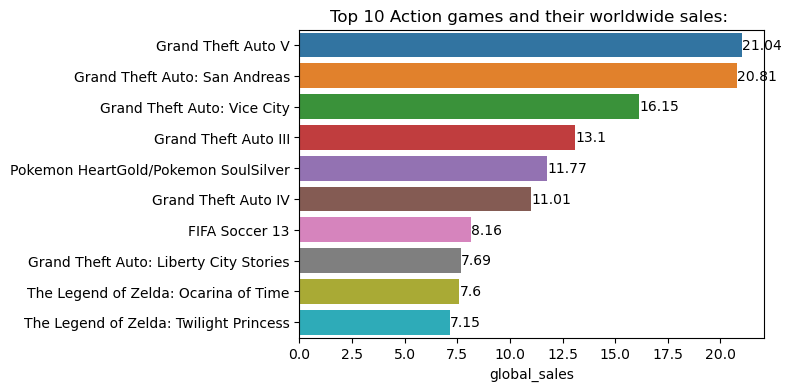

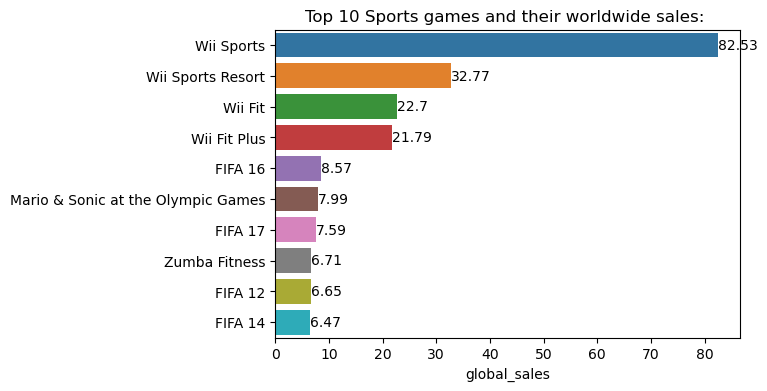

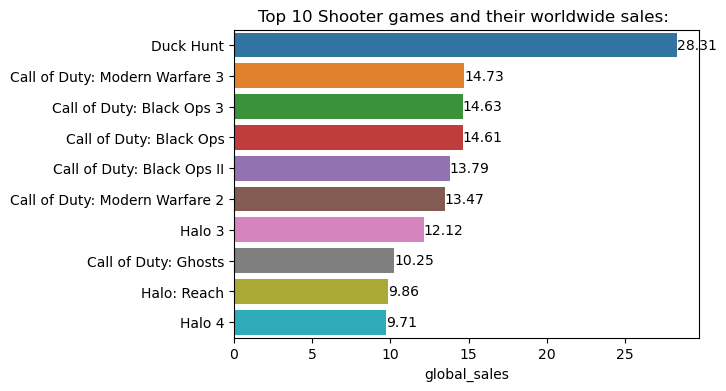

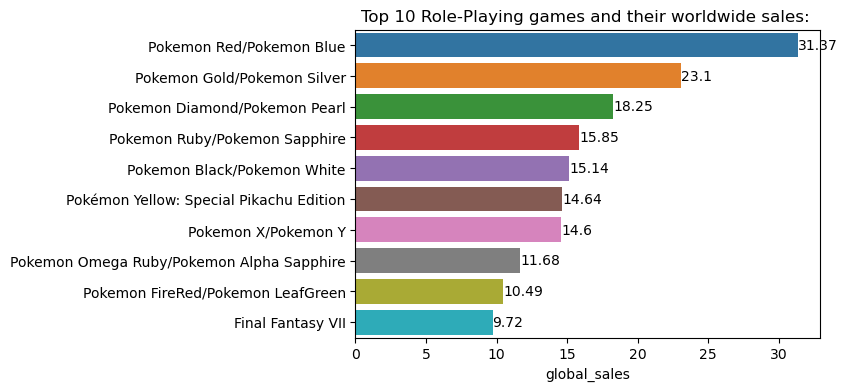

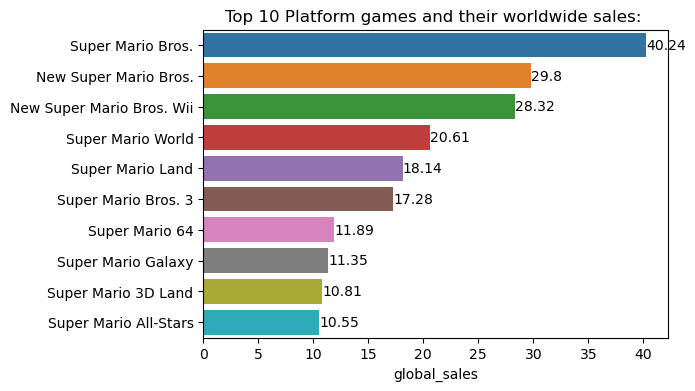

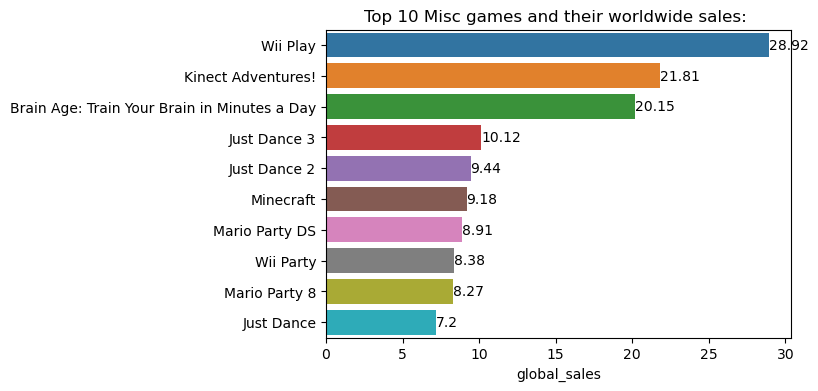

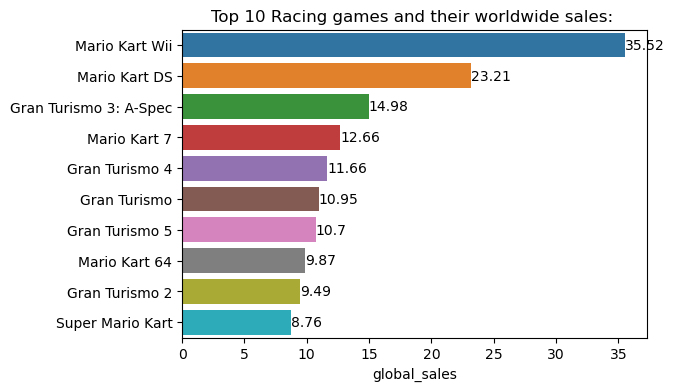

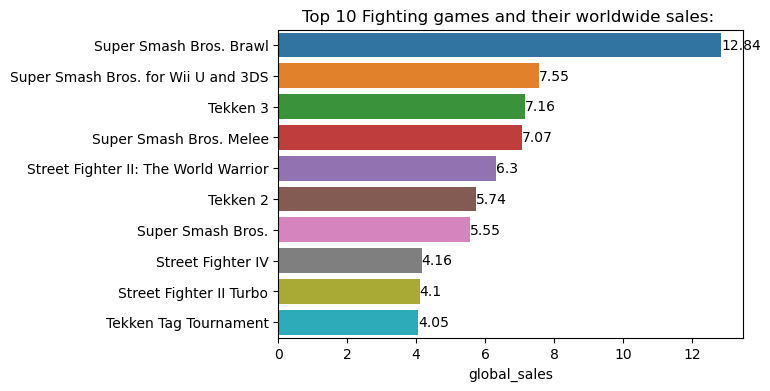

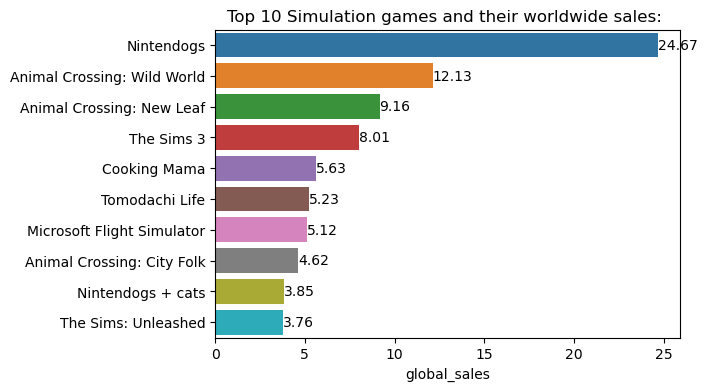

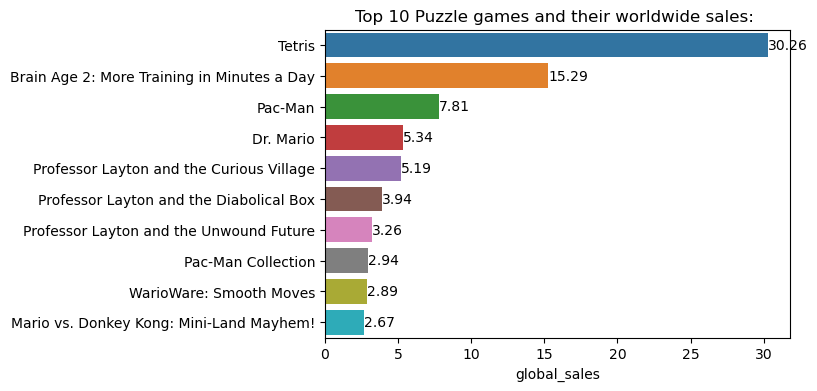

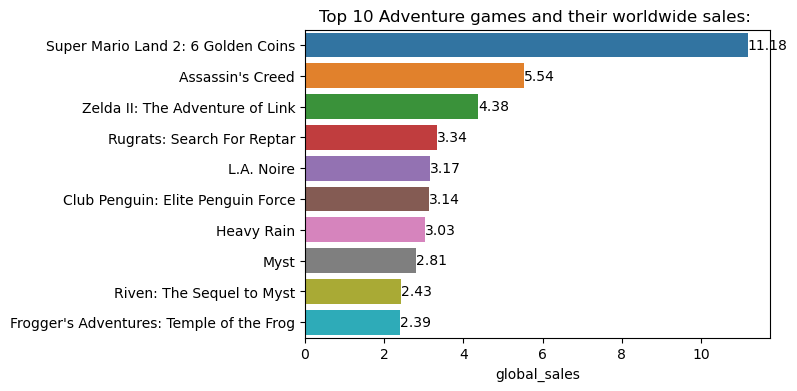

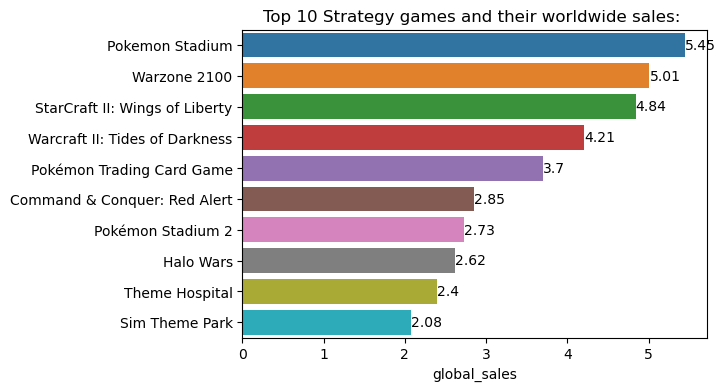

In [56]:
genres_list = list(genre_wise_game_sales.index)
for genre in genres_list:
    gamesPerGenre(genre)

 <i>
 <ul>
    <li> GTA is crushing it in the action genre. Special mention: Legend of Zelda. </li>
    <li> Wii sports being a showcase collection of five sports simulations, garnered a lot of love. FIFA is EA's GOAT, and the numbers show it.</li>
<li> Genuinely surprised that the classic 1984 Duck Hunt has outsold COD's individual titles. COD series has a chokehold on "Shooter" genre, and by the looks of it, a loyal fanbase. </li>
<li> The Pokemon series rules the roost in RPG - but the Final Fantasy series also deserves a special mention. </li>
    <li> Platform games = Super Mario - by the looks of it! </li>
    <li> Wii play encompasses multiple genres, and Kinect adventures was a early explorer of motion based gaming. Brain Age making it to the top 3 of the Misc list is a pleasant surprise. It's surprising that this featured in the misc list and not in the puzle list like it's successor. Glad to see that the iconic Just Dance series features here. </li>
    <li> Seeing "Sims" in the Simulation Game top 10 list feels fitting. Animal Crossing seems to have a long running popularity. </li>
    <li> While seeing Tetris top the chart in Puzzle games is a no brainer, I'm genuinely surprised to see the "Professor Layton" series here. </li>
    <li> The fact that I have not played any of the top 10 strategy games is plain shocking. Why doesn't AOE/Rise of Nations feature here?</li>
    </ul>
    </i>

### Lowest grossing games

In [57]:
min_sales = np.min(games.global_sales)
print("Games having least global sales: ") 
games[games.global_sales == min_sales][["name","global_sales","genre"]]

Games having least global sales: 


,name,global_sales,genre
16081,Football Manager 2007,0.01,Sports
16082,Ferrari: The Race Experience,0.01,Racing
16083,Dragon Zakura DS,0.01,Misc
16084,Chameleon: To Dye For!,0.01,Puzzle
16085,Sora no Otoshimono: DokiDoki Summer Vacation,0.01,Adventure
...,...,...,...
16714,Samurai Warriors: Sanada Maru,0.01,Action
16715,LMA Manager 2007,0.01,Sports
16716,Haitaka no Psychedelica,0.01,Adventure
16717,Spirits & Spells,0.01,Platform


### Highest selling game regionally

In [58]:
na_sales_max = games.na_sales.max()
print("Highest selling game in North America:")
games[games["na_sales"] == na_sales_max][["name","na_sales"]]

Highest selling game in North America:


,name,na_sales
0,Wii Sports,41.36


### Highest sold Game in Europe

In [59]:
eu_sales_max = games.eu_sales.max()
print("Highest selling game in Europe:")
games[games["eu_sales"] == eu_sales_max][["name","eu_sales"]]

Highest selling game in Europe:


,name,eu_sales
0,Wii Sports,28.96


### Highest selling game in Japan

In [60]:
jp_sales_max = games.jp_sales.max()
print("highest sold Game in Japan :")
games[games["jp_sales"] == jp_sales_max][["name","jp_sales"]]

highest sold Game in Japan :


,name,jp_sales
4,Pokemon Red/Pokemon Blue,10.22


### Which is the highest sold Game in other geos

In [61]:
other_sales_highest_sold_game = games.other_sales.max()
print("highest sold Game in Other_Sales :")
games[games["other_sales"] == other_sales_highest_sold_game][["name","other_sales"]]

highest sold Game in Other_Sales :


,name,other_sales
17,Grand Theft Auto: San Andreas,10.57


## Total Sales Year Wise

Text(0, 0.5, 'Global sales in millions')

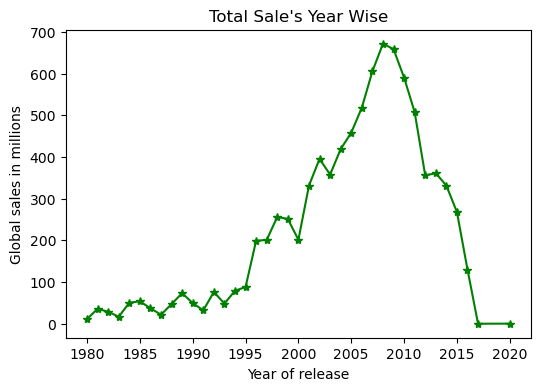

In [62]:
tot_sales_year_wise = pd.pivot_table(games,index = "year_of_release",values = "global_sales",aggfunc= np.sum)
#print(avg_sales_year_wise) #uncomment this to know Total sale's value's with respect each year.
plt.plot(tot_sales_year_wise.index,tot_sales_year_wise["global_sales"],color = 'g',marker = "*")
plt.title("Total Sale's Year Wise")
plt.xlabel("Year of release")
plt.ylabel("Global sales in millions")

In [63]:
# dropping columns
data = games.copy().dropna(how="any")
data.drop(["na_sales","eu_sales","jp_sales","other_sales"],axis = 1,inplace = True)

In [64]:
def data_encode(x_data):
    for i in x_data.columns:
        x_data[i]=x_data[i].factorize()[0]
        
    return x_data    
    
x_data = data.drop("global_sales",axis = 1)
y_data = data[["global_sales"]]
x_data = data_encode(x_data)

# Building Regression Models for global_sales

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [66]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_data,y_data,test_size=.3,random_state=1)

## Linear Regression

In [67]:
lr_model =LinearRegression()
lr_model.fit(xtrain,ytrain)
ypred=lr_model.predict(xtest)
n = len(xtest)
p = xtest.shape[1]
r2_value = r2_score(ytest,ypred)
adjusted_r2_score = 1 - (((1-r2_value)*(n-1)) /(n-p-1))
print("r2_score for Linear Reg model : ",r2_score(ytest,ypred))
print("adjusted_r2_score Value       : ",adjusted_r2_score)                         
print("MSE for Linear Regression     : ",mean_squared_error(ytest,ypred))

r2_score for Linear Reg model :  0.24193393858652246
adjusted_r2_score Value       :  0.23783829680088975
MSE for Linear Regression     :  1.671286465032641


## Random Forest Regressor

In [68]:
r2_scores = []
adjusted_r2_scores = []
mean_squared_errors = []
r = range(1,101)
for i in r:
    rf_model = RandomForestRegressor(n_estimators=i,min_samples_split=20,random_state=43)
    rf_model.fit(xtrain,np.ravel(ytrain))
    ypred = rf_model.predict(xtest)
    n = len(xtest)
    p = xtest.shape[1]
    r2_value = r2_score(np.ravel(ytest),ypred)
    adjusted_r2_score = 1 - (((1-r2_value)*(n-1)) /(n-p-1))
    mse = mean_squared_error(np.ravel(ytest),ypred)
    r2_scores.append(r2_value)
    adjusted_r2_scores.append(adjusted_r2_score)
    mean_squared_errors.append(mse)

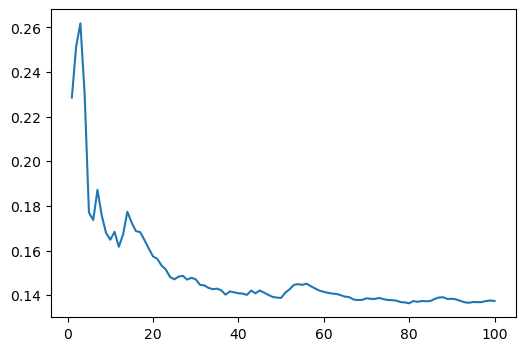

In [69]:
# random forest seems fine
plt.plot(list(r), mean_squared_errors)
plt.show()

In [70]:
print(mean_squared_errors.index(np.min(mean_squared_errors)))
print(np.min(mean_squared_errors))

79
0.13635337373275244


In [71]:
print(mean_squared_errors[49]) #50 estimators appear to be sufficient

0.1387505907965678


In [72]:
print("r2_score for Random Forest Reg model : ",r2_scores[49])
print("adjusted_r2_score Value              : ",adjusted_r2_scores[49])
print("MSE for Random Forest Regression     : ",mean_squared_errors[49])

r2_score for Random Forest Reg model :  0.9370651793785136
adjusted_r2_score Value              :  0.9367251582454899
MSE for Random Forest Regression     :  0.1387505907965678


<b> Random forest gives us the best R2 score for the task of global_sales prediction. </b>

## SVR

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR

In [74]:
regr = make_pipeline(StandardScaler(), SVR(C=50, epsilon=0.2))
regr.fit(xtrain, np.ravel(ytrain))
ypred = regr.predict(xtest)
r2_value = r2_score(np.ravel(ytest),ypred)
adjusted_r2_score = 1 - (((1-r2_value)*(n-1)) /(n-p-1))
mse = mean_squared_error(np.ravel(ytest),ypred)
print("r2_score for Random Forest Reg model : ",r2_score(ytest,ypred))
print("adjusted_r2_score Value              : ",adjusted_r2_score)
print("MSE for Random Forest Regression     : ",mean_squared_error(ytest,ypred))

r2_score for Random Forest Reg model :  0.8256122482397282
adjusted_r2_score Value              :  0.8246700747282533
MSE for Random Forest Regression     :  0.3844676658403332


In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear', 'rbf'), 'C':[1,5,10,15,20,25,30,35,40,45,50]}
sc_x = StandardScaler()
sc_y = StandardScaler()
xtrain_scaled = sc_x.fit_transform(xtrain)
ytrain_scaled = sc_y.fit_transform(ytrain)

In [ ]:
svr = SVR()
clf = GridSearchCV(svr, parameters)
clf.fit(xtrain, np.ravel(ytrain))

In [ ]:
sorted(clf.cv_results_.keys())